### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [44]:
data = pd.read_csv('data/coupons.csv')

In [46]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Load the dataset from the "data" sub-folder
coupons_df = pd.read_csv("data/coupons.csv")

n_rows, n_cols = coupons_df.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns.")

# Display the column names and their corresponding data types
print(coupons_df.dtypes)

The DataFrame has 12684 rows and 26 columns.
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [5]:
# Check for missing values
print("=== Missing Values ===")
print(coupons_df.isnull().sum())

=== Missing Values ===
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [6]:
# Checking for missing values
missing_vals = coupons_df.isna().sum()

# Filtering only those columns which have missing values for a clearer output
missing_vals = missing_vals[missing_vals > 0]

print(missing_vals)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = coupons_df[coupons_df.duplicated()]
if len(duplicate_rows) > 0:
    print("\n=== Duplicate Rows ===")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")
duplicate_rows.shape


=== Duplicate Rows ===
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration

(74, 26)

In [8]:
# Look for possible outliers or anomalies
print("\n=== Data Overview ===")
print(coupons_df.describe())


=== Data Overview ===
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.0000

In [9]:
# Determine the unique values in categorical columns
for col in coupons_df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(coupons_df[col].value_counts())


Unique values in destination:
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

Unique values in passanger:
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

Unique values in weather:
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

Unique values in time:
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

Unique values in coupon:
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

Unique values in expiration:
1d    7091
2h    5593
Name: expiration, dtype: int64

Unique values in gender:
Female    6511
Male      6173
Name: gender, dtype: int64

Unique values in age:
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Drop the 'car' column due to excessive missing values
coupons_df.drop('car', axis=1, inplace=True)

# Drop the 'toCoupon_GEQ5min' column due to all values being 1, which is not believable
coupons_df.drop('toCoupon_GEQ5min', axis=1, inplace=True)

# Remove rows with NaN values in any column
coupons_df = coupons_df.dropna()

# Rename the 'passanger' column to 'passenger'
coupons_df = coupons_df.rename(columns={'passanger': 'passenger'})

# Display the shape of the original and cleaned dataframes
print("DataFrame shape:", coupons_df.shape)

# Display the column names and their corresponding data types
print(coupons_df.dtypes)

DataFrame shape: (12079, 24)
destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [11]:
# Drop duplicate rows
coupons_df.drop_duplicates(inplace=True)

# Reset index
coupons_df.reset_index(drop=True, inplace=True)

n_rows, n_cols = coupons_df.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns.")

The DataFrame has 12007 rows and 24 columns.


4. What proportion of the total observations chose to accept the coupon? 



In [12]:
accepted = coupons_df['Y'].sum() / len(coupons_df) * 100
print(f"{accepted:.2f}% of the total observations chose to accept the coupon.")

56.84% of the total observations chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

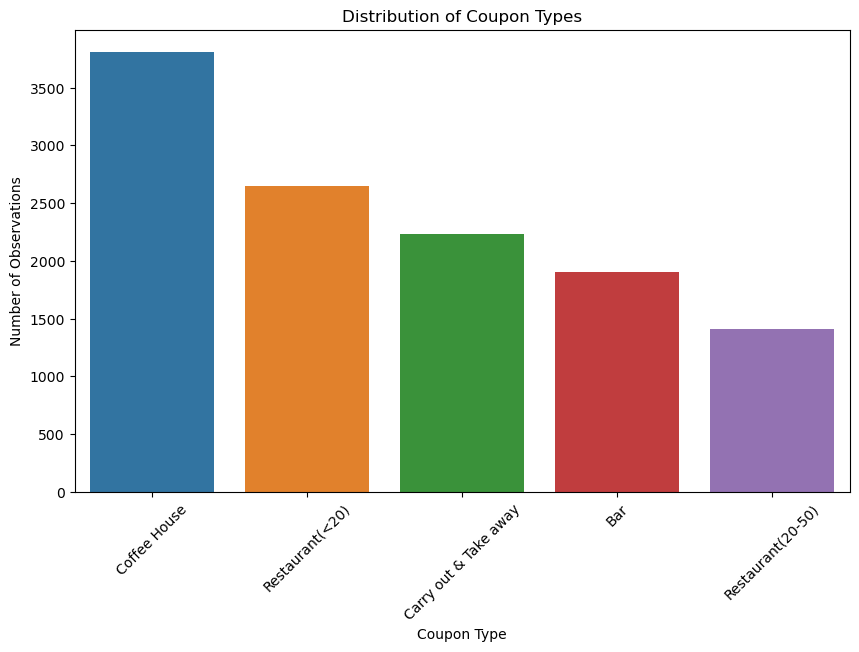

In [13]:
counts = coupons_df['coupon'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.ylabel('Number of Observations')
plt.xlabel('Coupon Type')
plt.title('Distribution of Coupon Types')
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

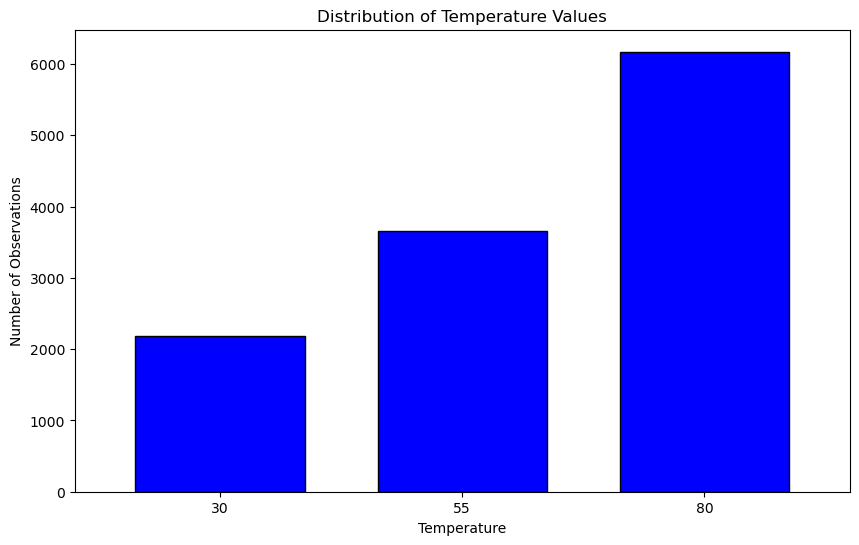

In [14]:
# Since the column values only take on three unique values, we can count the occurences of each, 
# sort by the index and plot as a bar chart. This provides a better visual

temp_counts = coupons_df['temperature'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
temp_counts.plot(kind='bar', color='blue', edgecolor='black', width=0.7)
plt.ylabel('Number of Observations')
plt.xlabel('Temperature')
plt.title('Distribution of Temperature Values')
plt.xticks(rotation=0)  # This ensures that the x-labels are horizontal

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_coupons_df = coupons_df[coupons_df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [16]:
accepted = bar_coupons_df['Y'].mean()
print(f"The proportion of bar coupons that were accepted is {accepted:.2%}")

The proportion of bar coupons that were accepted is 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# Segmenting the DataFrame
undr_3_times = bar_coupons_df[ bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
over_3_times = bar_coupons_df[~bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]

# Calculating acceptance rates
rate_undr_3 = undr_3_times['Y'].mean()
rate_over_3 = over_3_times['Y'].mean()

# Printing the results
print(f"Acceptance Rate - Drivers with <= 3 bar visits a month: {rate_undr_3:.2%}")
print(f"Acceptance Rate - Drivers with >  3 bar visits a month: {rate_over_3:.2%}")

Acceptance Rate - Drivers with <= 3 bar visits a month: 37.24%
Acceptance Rate - Drivers with >  3 bar visits a month: 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# First, we need to ensure that the 'age' column is of integer type for comparison
coupons_df['age'] = pd.to_numeric(coupons_df['age'], errors='coerce')

trget_grp = coupons_df[(~coupons_df['Bar'].isin(['never', 'less1'])) & (coupons_df['age'] > 25)]
other_grp = coupons_df[~coupons_df.index.isin(trget_grp.index)]

# Calculating acceptance rates for both segments
rate_trget_grp = trget_grp['Y'].mean()
rate_other_grp = other_grp['Y'].mean()
difference     = rate_trget_grp - rate_other_grp

# Printing the results
print(f"Acceptance Rate - Drivers with > 1 bar visit a month and Age > 25: {rate_trget_grp:.2%}")
print(f"Acceptance Rate - All Other Drivers: {rate_other_grp:.2%}")
print(f"Acceptance Rate - Difference: {difference:.2%}")

Acceptance Rate - Drivers with > 1 bar visit a month and Age > 25: 62.54%
Acceptance Rate - All Other Drivers: 55.51%
Acceptance Rate - Difference: 7.02%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [19]:
# Segment for drivers who meet the criteria
trget_grp = coupons_df[
    (~coupons_df['Bar'].isin(['never', 'less1'])) &
    ( coupons_df['passenger' ] != 'Kids') &
    ( coupons_df['occupation'] != 'Farming Fishing & Forestry')
]
other_grp = coupons_df[~coupons_df.index.isin(trget_grp.index)]

# Calculating acceptance rates for both segments
rate_trget_grp = trget_grp['Y'].mean()
rate_other_grp = other_grp['Y'].mean()
difference     = rate_trget_grp - rate_other_grp

# Printing the results
print(f"Acceptance Rate - Drivers who 1) have > 1 bar visit a month, 2) have no kid passengers, and 3) not in farming, fishing, or forestry: {rate_trget_grp:.2%}")
print(f"Acceptance Rate - All Other Drivers: {rate_other_grp:.2%}")
print(f"Acceptance Rate - Difference: {difference:.2%}")

Acceptance Rate - Drivers who 1) have > 1 bar visit a month, 2) have no kid passengers, and 3) not in farming, fishing, or forestry: 62.27%
Acceptance Rate - All Other Drivers: 54.38%
Acceptance Rate - Difference: 7.89%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
import numpy as np

# Replace missing values in 'age' with a placeholder value, e.g., -1
coupons_df['age'] = coupons_df['age'].replace(np.nan, -1)

# Convert numeric values in 'age' to int64
coupons_df['age'] = coupons_df['age'].apply(lambda x: int(x) if x != '50plus' and x != 'below21' else x)

group_1 = coupons_df[
    (~coupons_df['Bar'].isin(['never', 'less1'])) &
    ( coupons_df['passenger'    ] != 'Kid') &
    ( coupons_df['maritalStatus'] != 'Widowed')
]

group_2 = coupons_df[
    (~coupons_df['Bar'].isin(['never', 'less1'])) &
    ((coupons_df['age'] < 30) | (coupons_df['age'] == 'below21'))
]

group_3 = coupons_df[
    (coupons_df['RestaurantLessThan20'].isin(['gt8', '4~8'])) &
    (coupons_df['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']))
]

# Calculating acceptance rates for each segment
rate_group_1 = group_1['Y'].mean()
rate_group_2 = group_2['Y'].mean()
rate_group_3 = group_3['Y'].mean()

print("Grp 1 Acceptance Rate:", rate_group_1)
print("Grp 2 Acceptance Rate:", rate_group_2)
print("Grp 3 Acceptance Rate:", rate_group_3)

# Calculate the overall acceptance rate for all coupons
overall_acceptance_rate = coupons_df['Y'].mean()

print("Overall Acceptance Rate for All Coupons:", overall_acceptance_rate)

Grp 1 Acceptance Rate: 0.6227272727272727
Grp 2 Acceptance Rate: 0.624168947985921
Grp 3 Acceptance Rate: 0.602087114337568
Overall Acceptance Rate for All Coupons: 0.5684184225868244


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [21]:
ans1 = "There isn't a lot of variability in the rates between the segmented groups. However, the overall bar coupon acceptance rate is 20 percentage points lower. Therefore, segmenting the driver population to target drivers with these characteristics is beneficial for increasing coupon acceptance rates. Based on the results, drivers who are more likely to accept the coupons do not have child passengers, are 1) below the age of 30, 2) have incomes less than $50k, 3) frequent cheap restaurants, 4) already visit bars more frequently than the average driver, and 5) are not widowed."
print(ans1)

There isn't a lot of variability in the rates between the segmented groups. However, the overall bar coupon acceptance rate is 20 percentage points lower. Therefore, segmenting the driver population to target drivers with these characteristics is beneficial for increasing coupon acceptance rates. Based on the results, drivers who are more likely to accept the coupons do not have child passengers, are 1) below the age of 30, 2) have incomes less than $50k, 3) frequent cheap restaurants, 4) already visit bars more frequently than the average driver, and 5) are not widowed.


In [22]:
# Filter the DataFrame to focus on the "CoffeeHouse" coupon group
coffeehouse_group = coupons_df[coupons_df['coupon'] == 'Coffee House']

# Calculate the sum of direction_same and direction_opp columns
coffeehouse_group['direction_sum'] = coffeehouse_group['direction_same'] + coffeehouse_group['direction_opp']

# Count the number of rows to be removed
n_removed_rows = coffeehouse_group[coffeehouse_group['direction_sum'] != 1].shape[0]

# Keep only the rows where direction_sum is equal to 1
coffeehouse_group = coffeehouse_group[coffeehouse_group['direction_sum'] == 1]

# Drop the direction_opp and direction_sum columns
coffeehouse_group = coffeehouse_group.drop(['direction_opp', 'direction_sum'], axis=1)

print(f"Number of rows removed: {n_removed_rows}")

Number of rows removed: 0


C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2954539589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_group['direction_sum'] = coffeehouse_group['direction_same'] + coffeehouse_group['direction_opp']


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

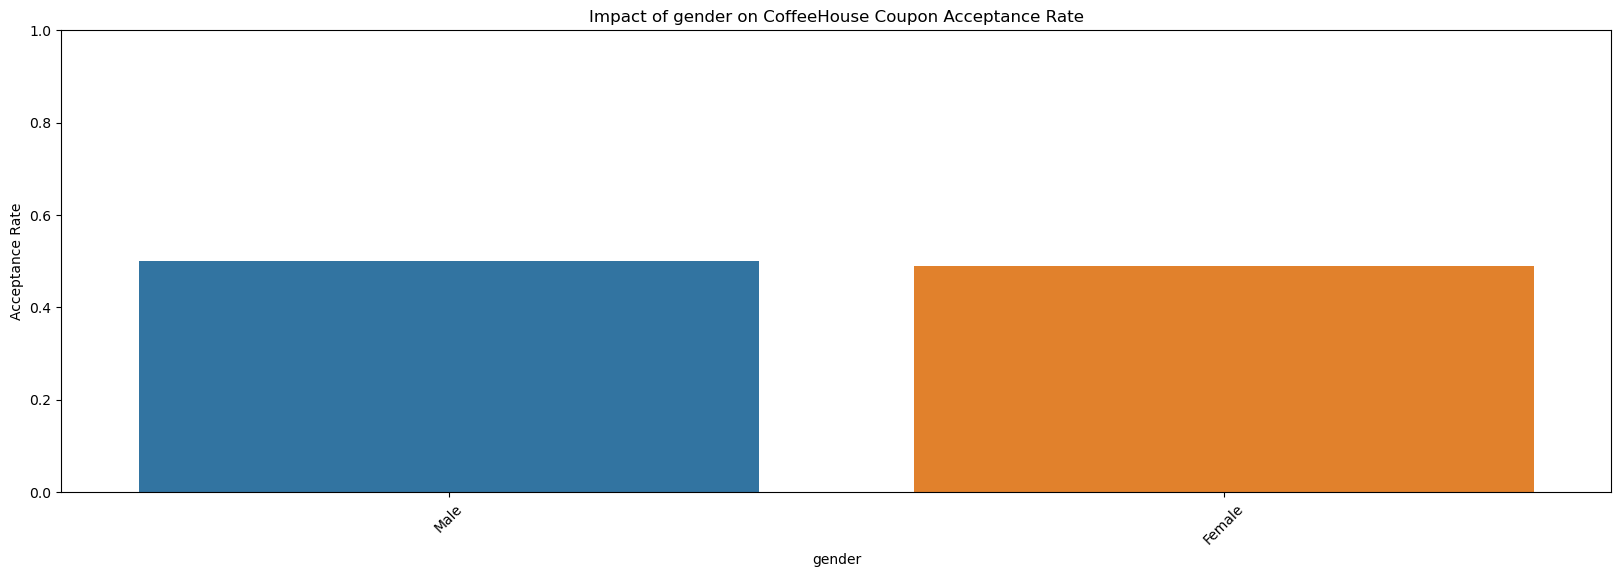

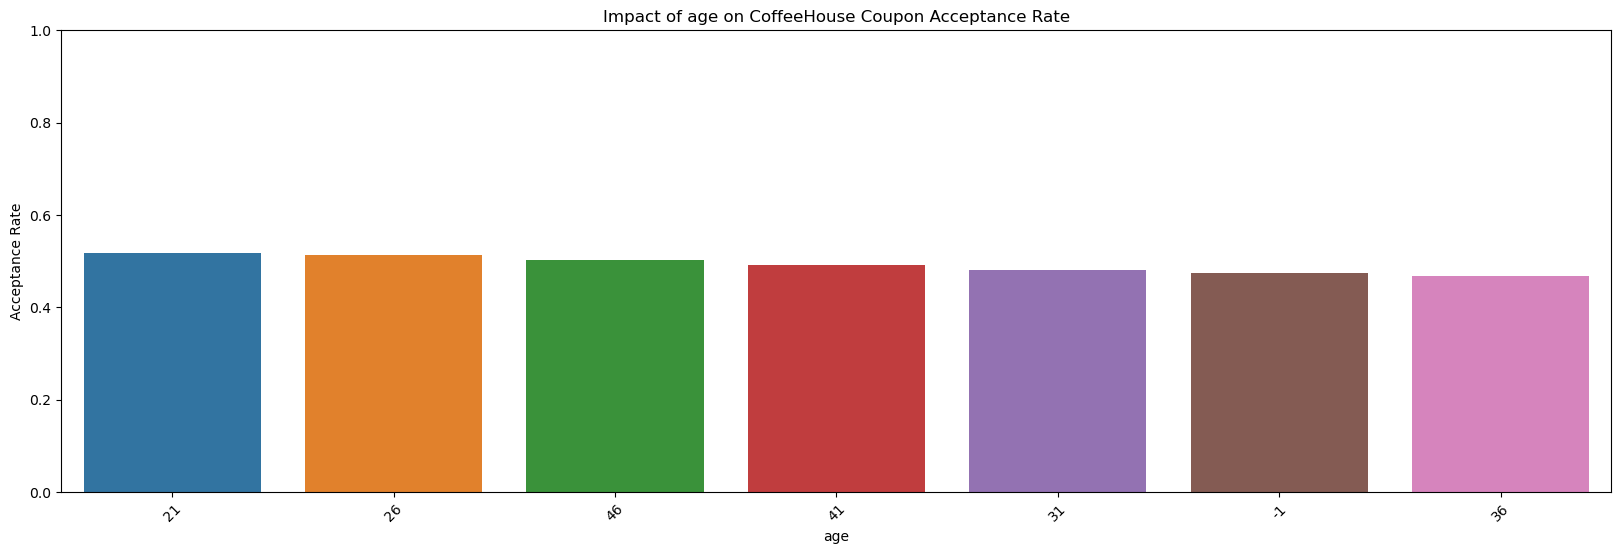

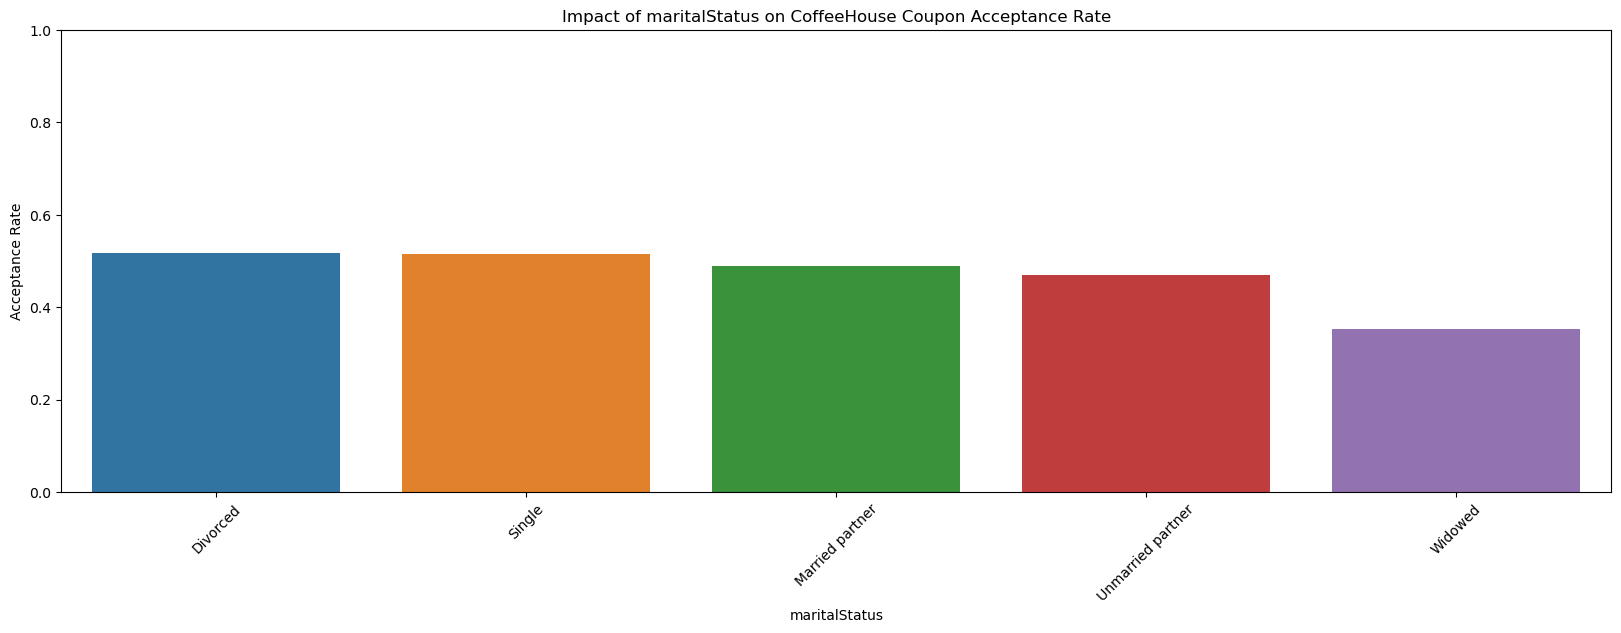

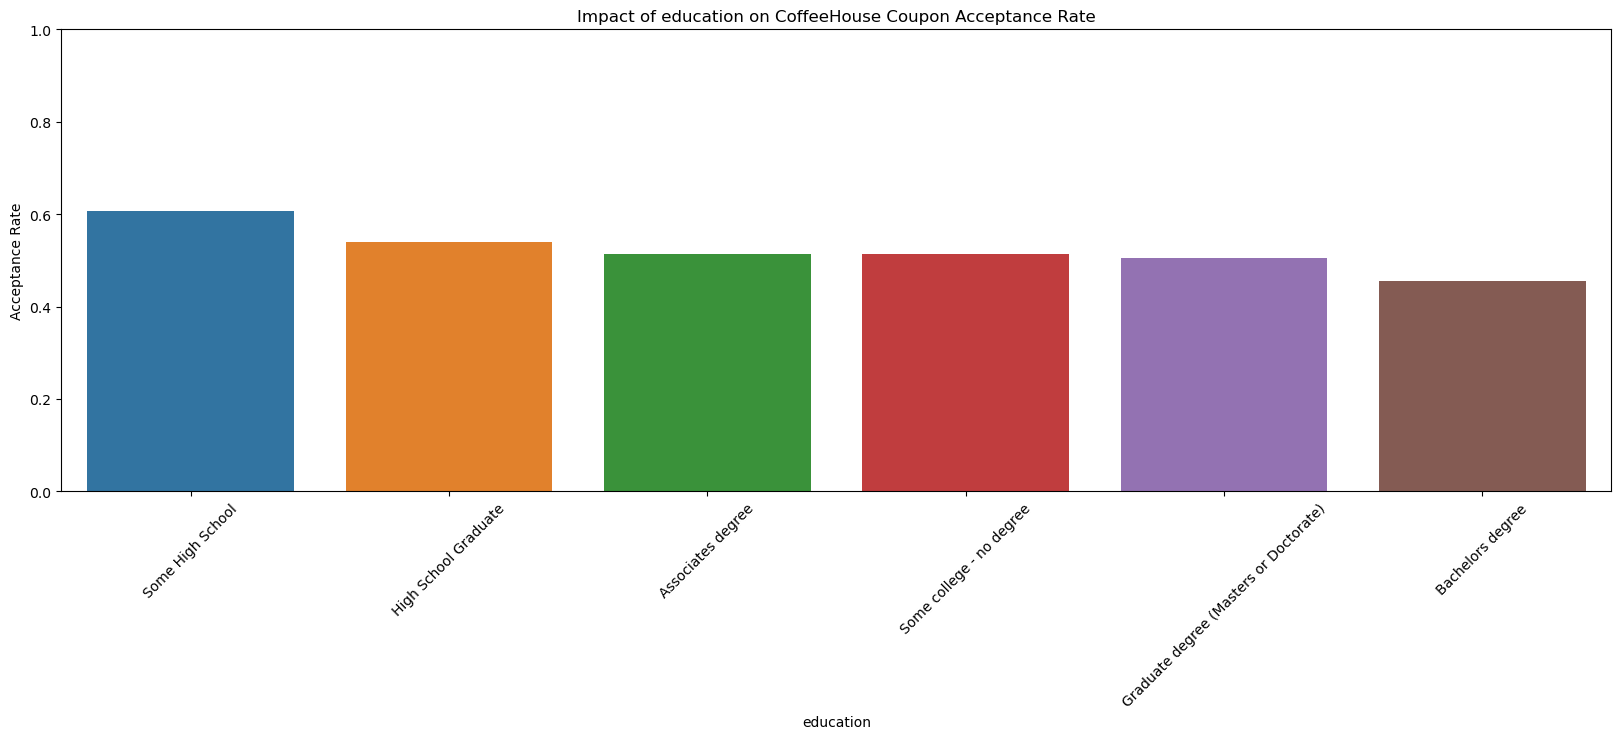

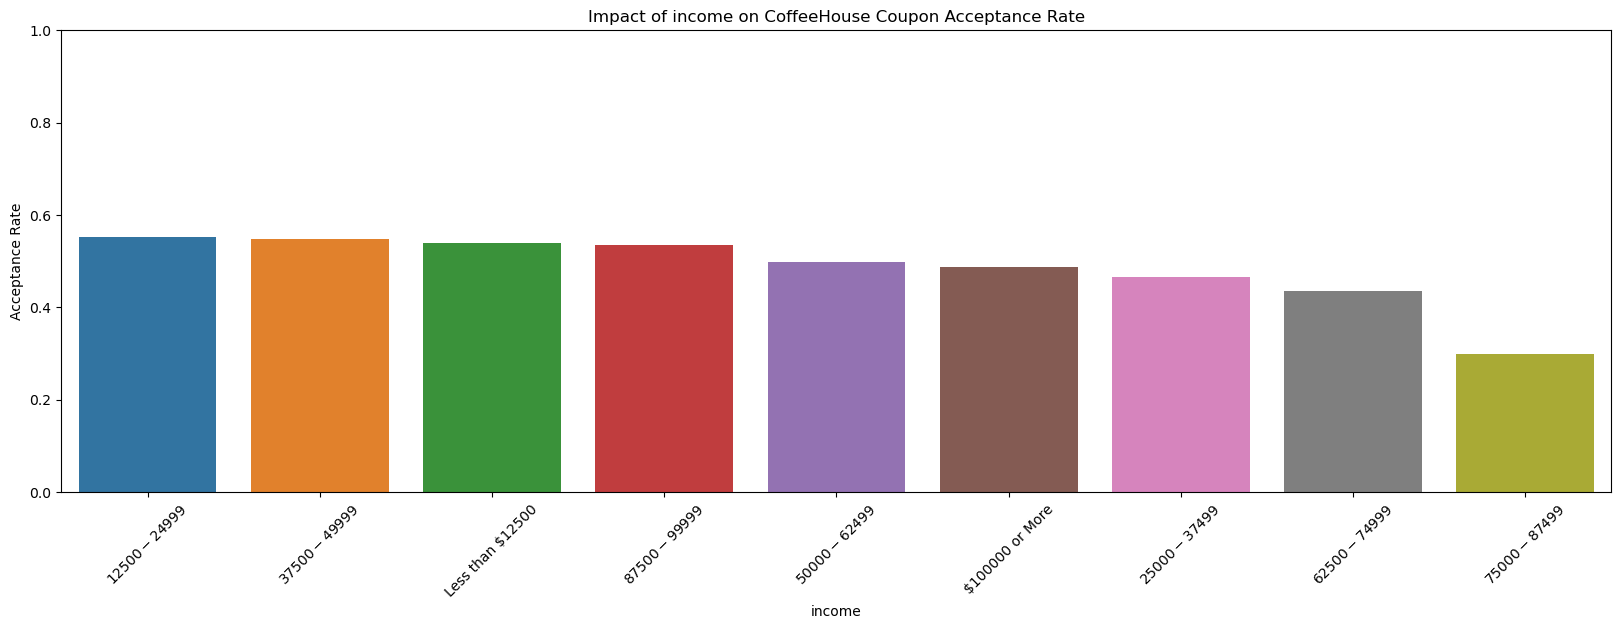

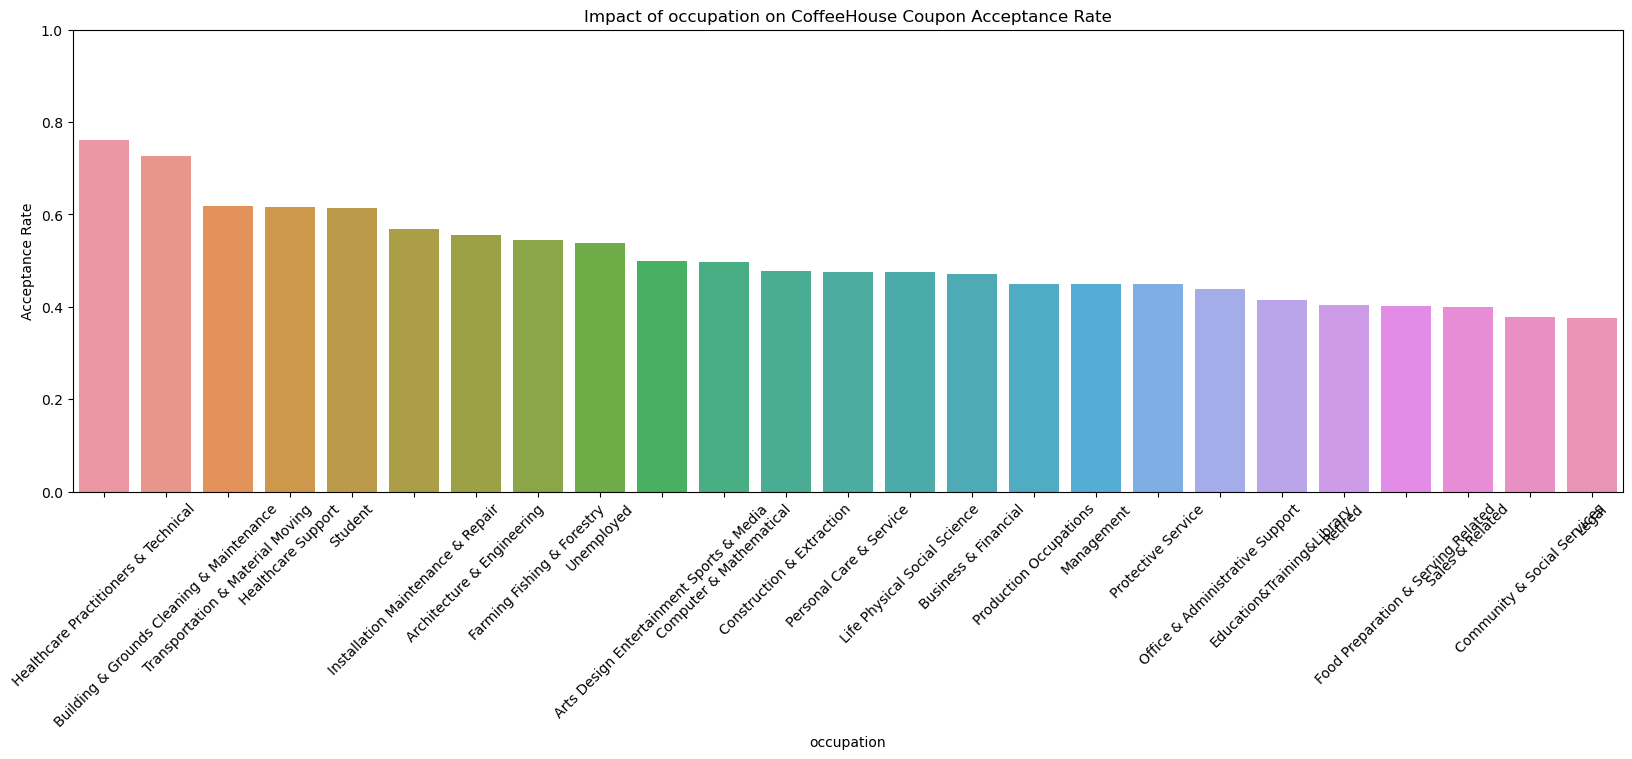

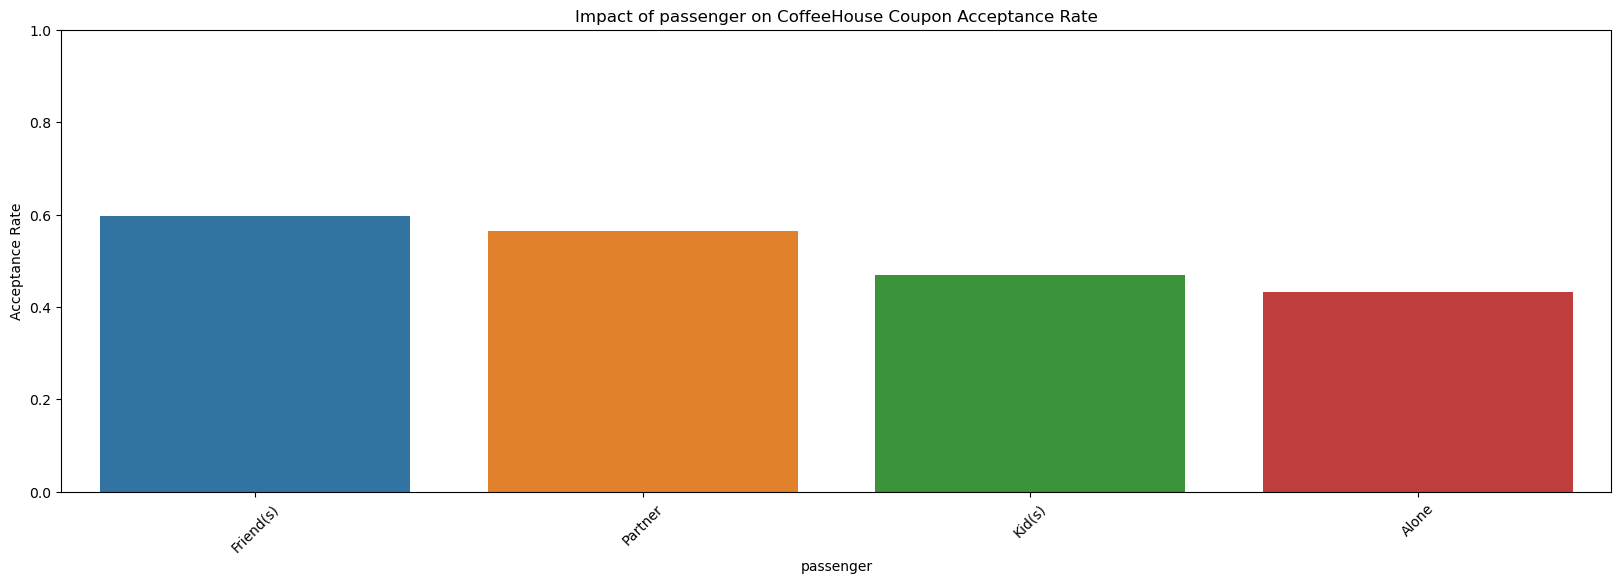

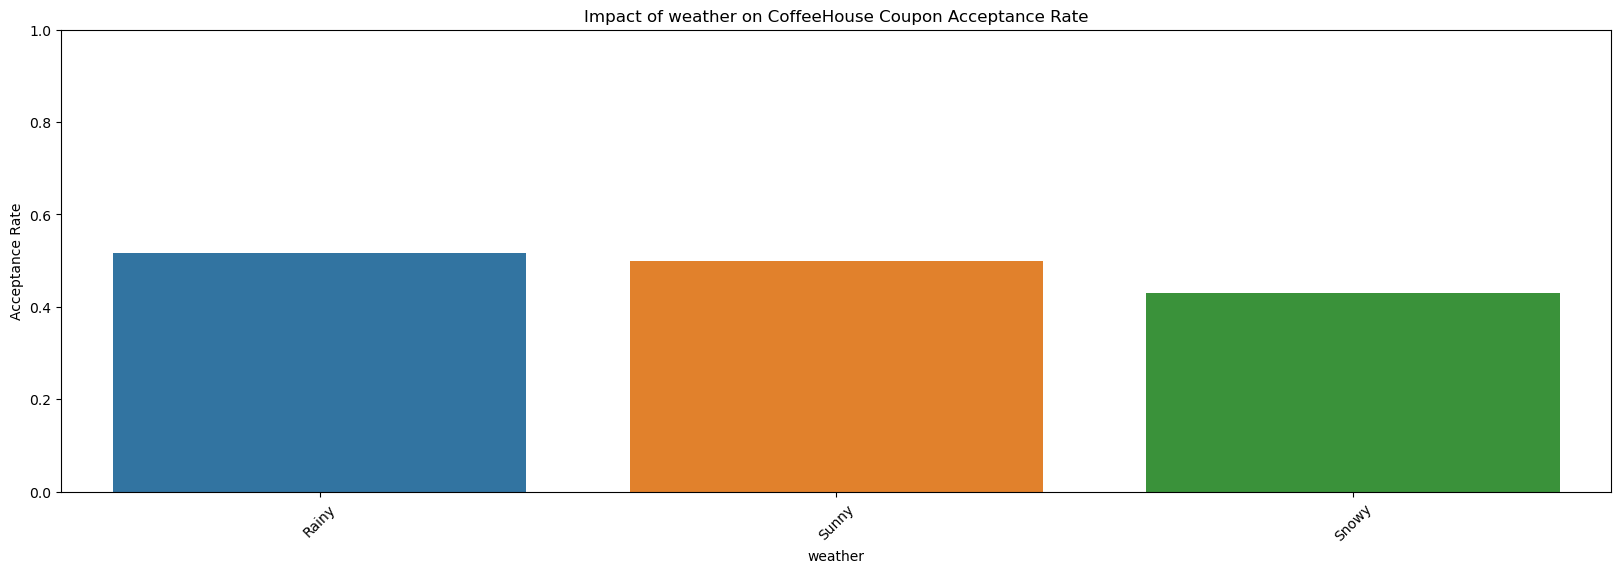

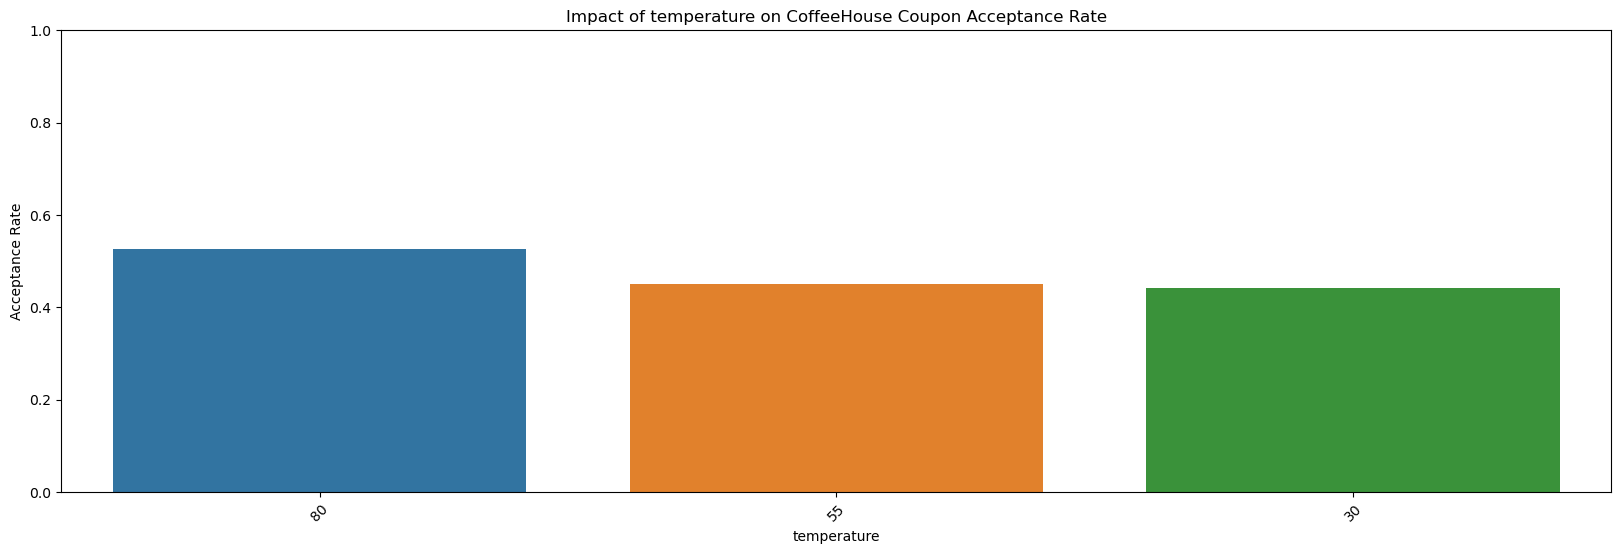

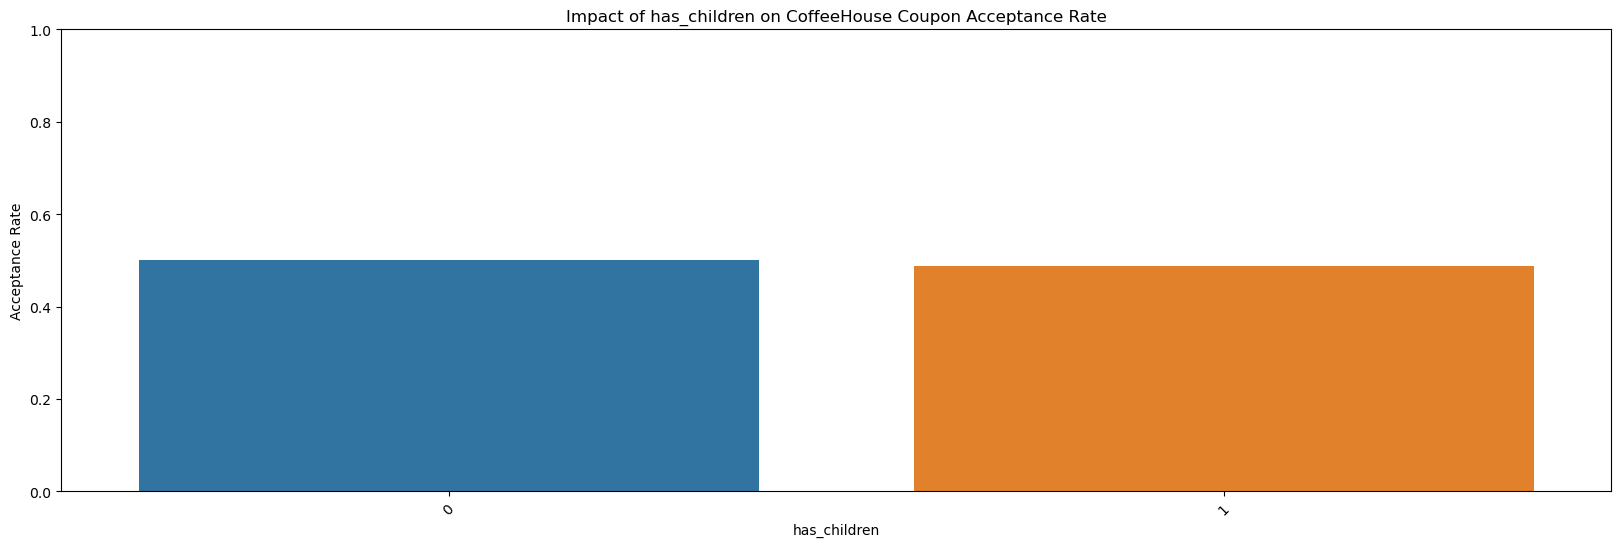

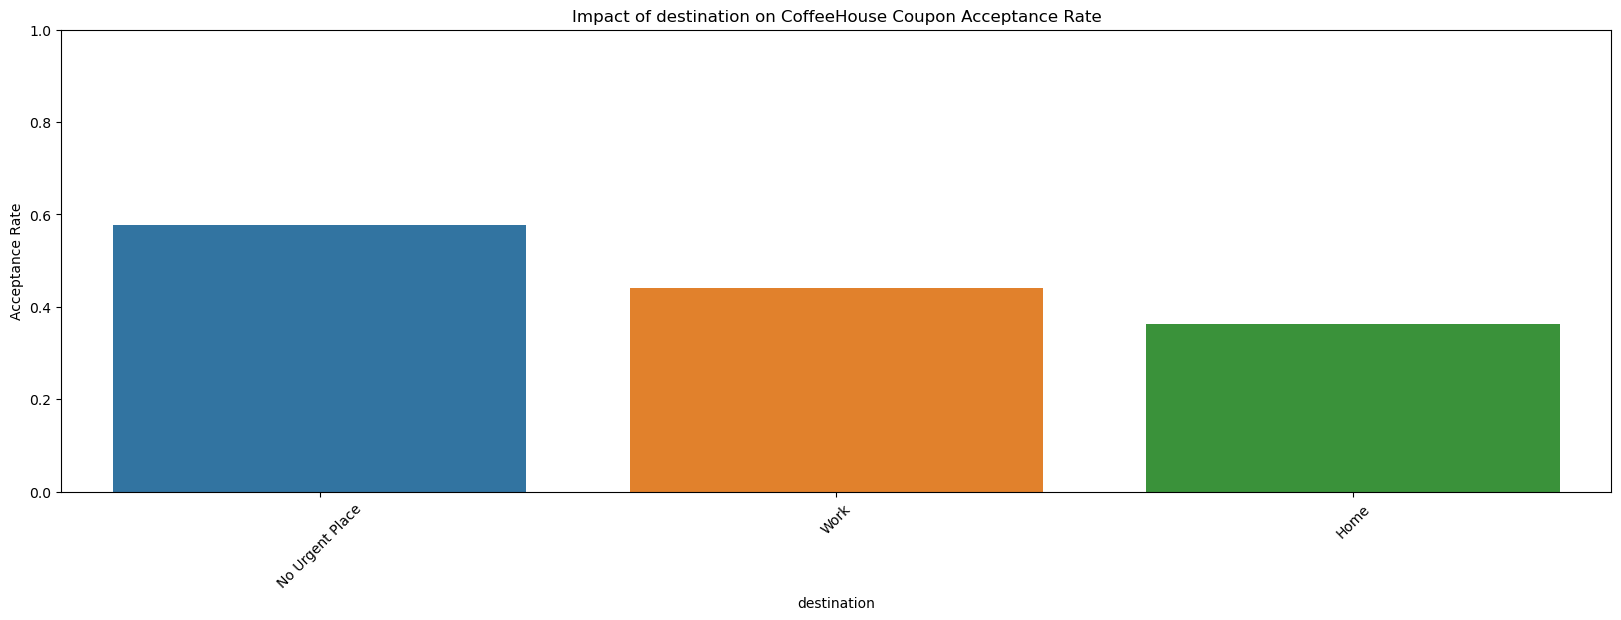

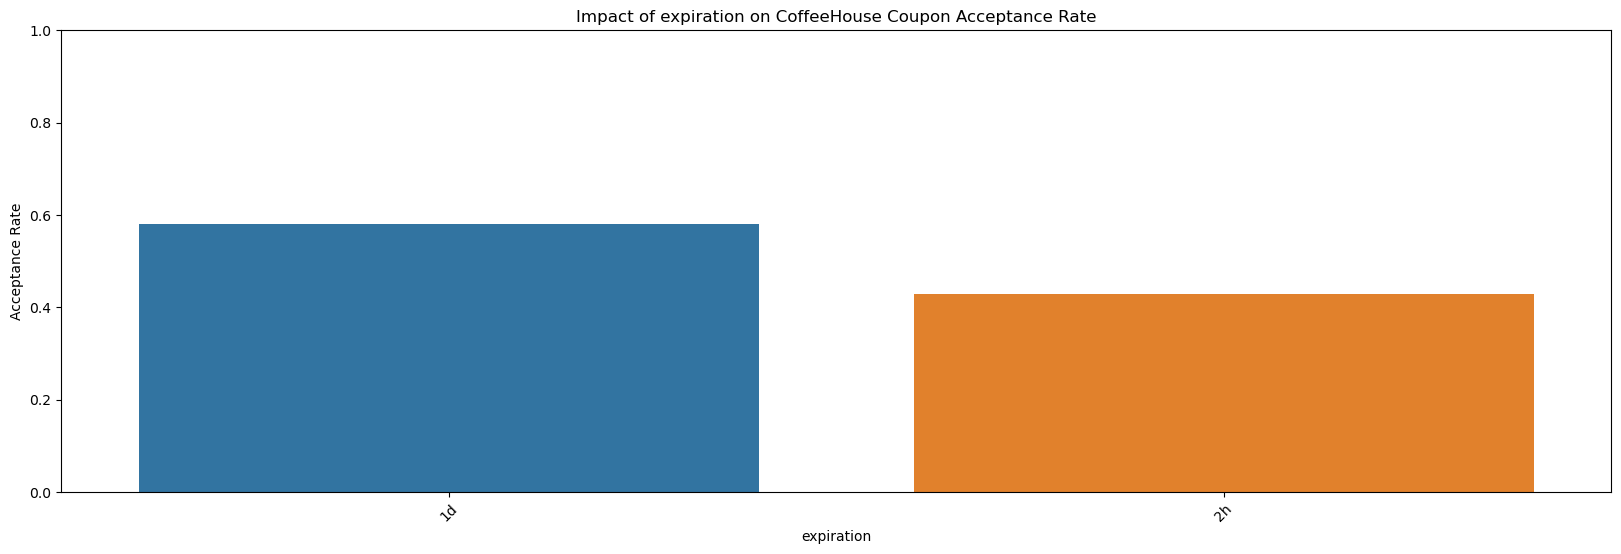

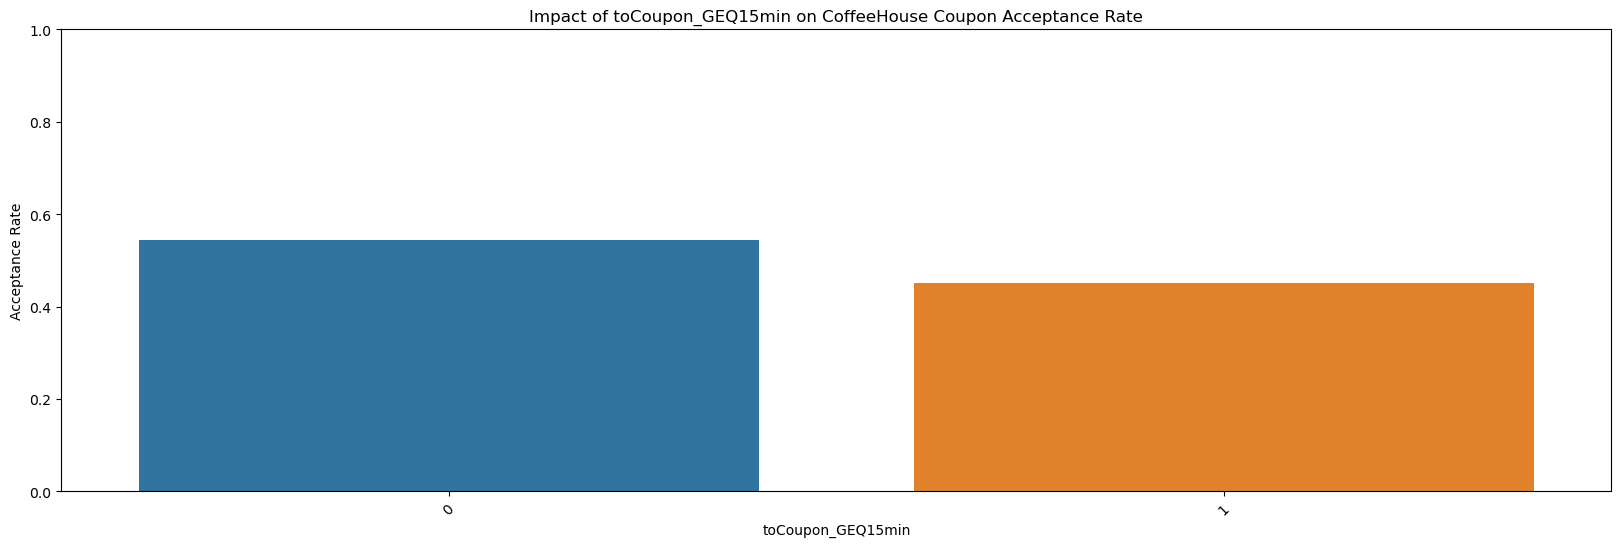

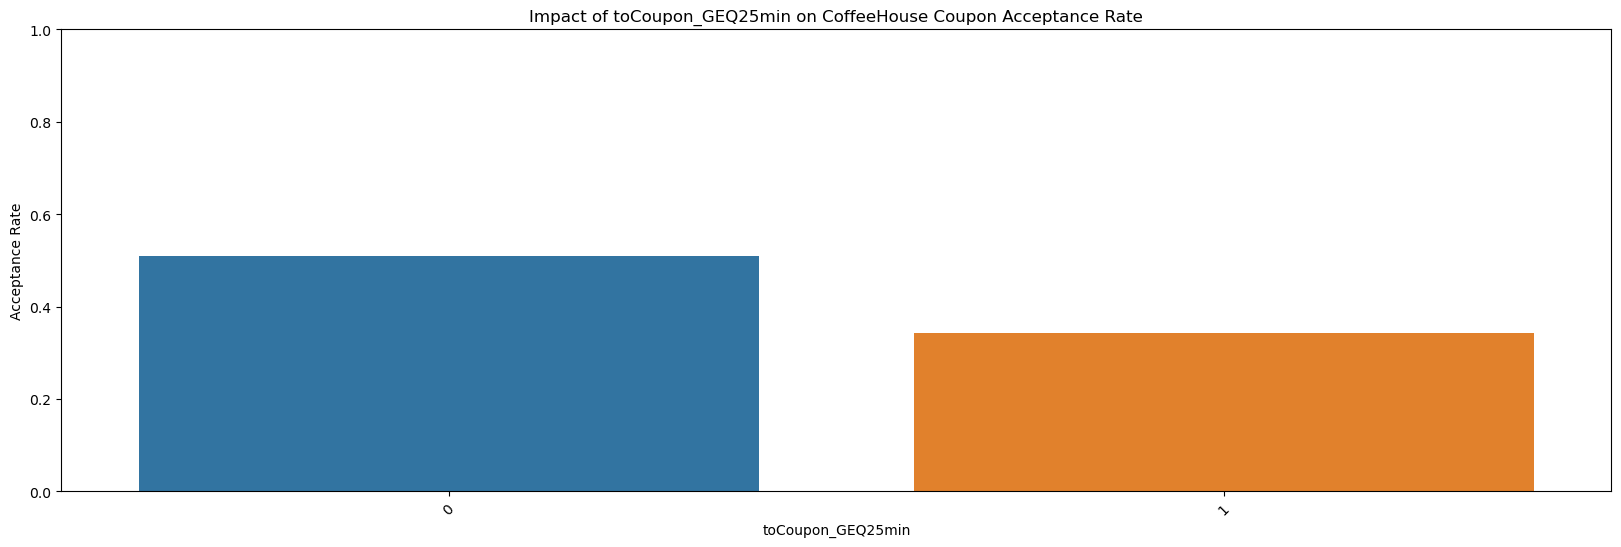

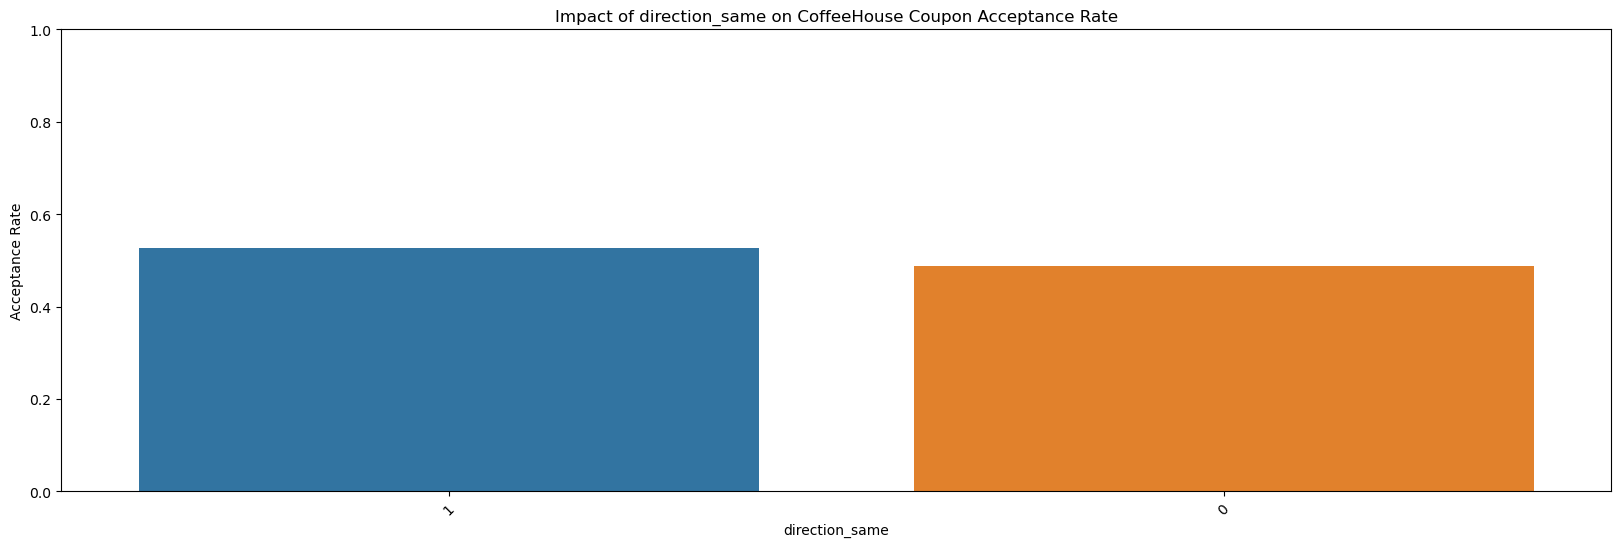

In [68]:
# Analyze the impact of driver characteristics on coupon acceptance rates
driver_characteristics = ['gender', 'age', 'maritalStatus', 'education', 'income', 'occupation', 'passenger', 'weather', 'temperature', 'has_children', 'destination', 'expiration', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same']
for characteristic in driver_characteristics:
    plt.figure(figsize=(20, 6))
    
    # Sorting the data based on acceptance rate for each characteristic
    sorted_data = coffeehouse_group.groupby(characteristic)['Y'].mean().reset_index().sort_values(by='Y', ascending=False)
    sns.barplot(x=characteristic, y='Y', data=sorted_data, order=sorted_data[characteristic])
    plt.title(f'Impact of {characteristic} on CoffeeHouse Coupon Acceptance Rate')
    plt.xlabel(characteristic)
    plt.ylabel('Acceptance Rate')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    
    # Construct the filename and path to save the plot
    filename = f"Images/Impact_of_{characteristic}_on_CoffeeHouse_Coupon_Acceptance_Rate.png"
    plt.savefig(filename, bbox_inches='tight')  # bbox_inches='tight' ensures that the plot is saved without cutting off any part
    
    plt.show()  # Display the plot

In [24]:
# Create filters for the "Never", "Less than 1 time", and "Everyone Else" categories
never = coffeehouse_group[ coffeehouse_group['CoffeeHouse'] == 'never']
less1 = coffeehouse_group[ coffeehouse_group['CoffeeHouse'] == 'less1']
other = coffeehouse_group[~coffeehouse_group['CoffeeHouse'].isin(['Never', 'Less than 1 time'])]

correlation_matrix_never = never.corr()
correlation_matrix_less1 = less1.corr()
correlation_matrix_other = other.corr()

C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2527243594.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_never = never.corr()
C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2527243594.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_less1 = less1.corr()
C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2527243594.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_other = other

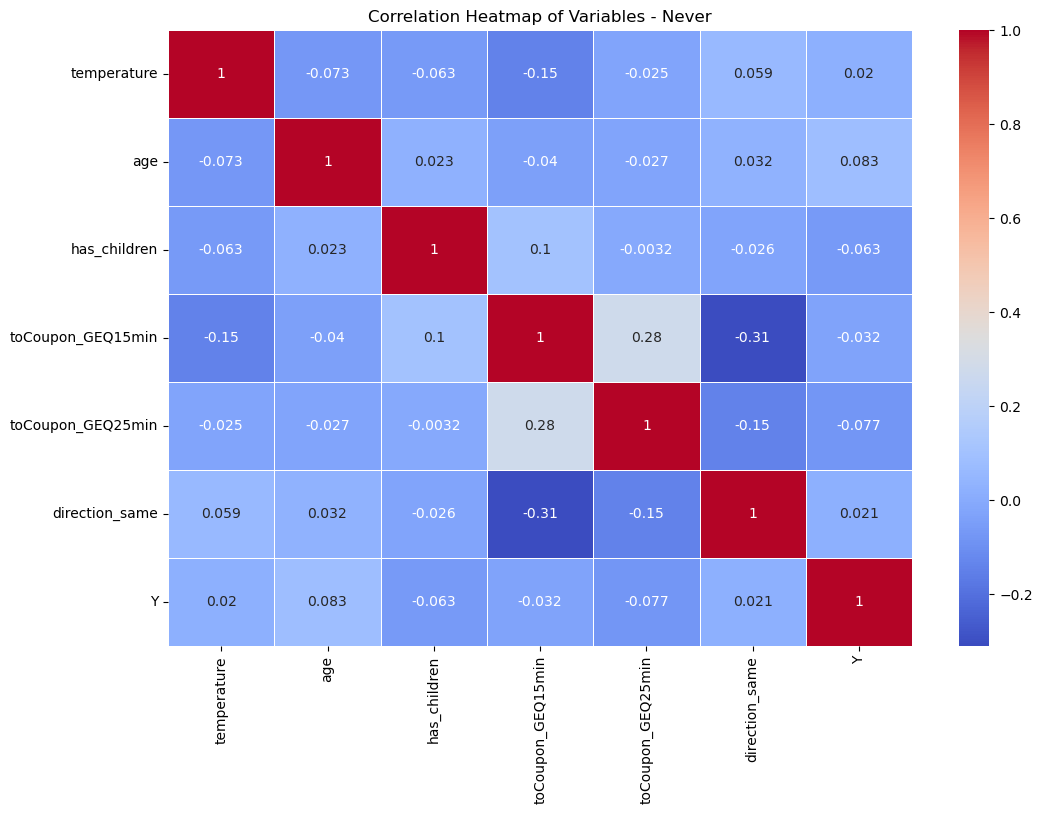

<Figure size 640x480 with 0 Axes>

In [25]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_never, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - Never")
plt.show()
plt.savefig('images/HeatMap_never.png')

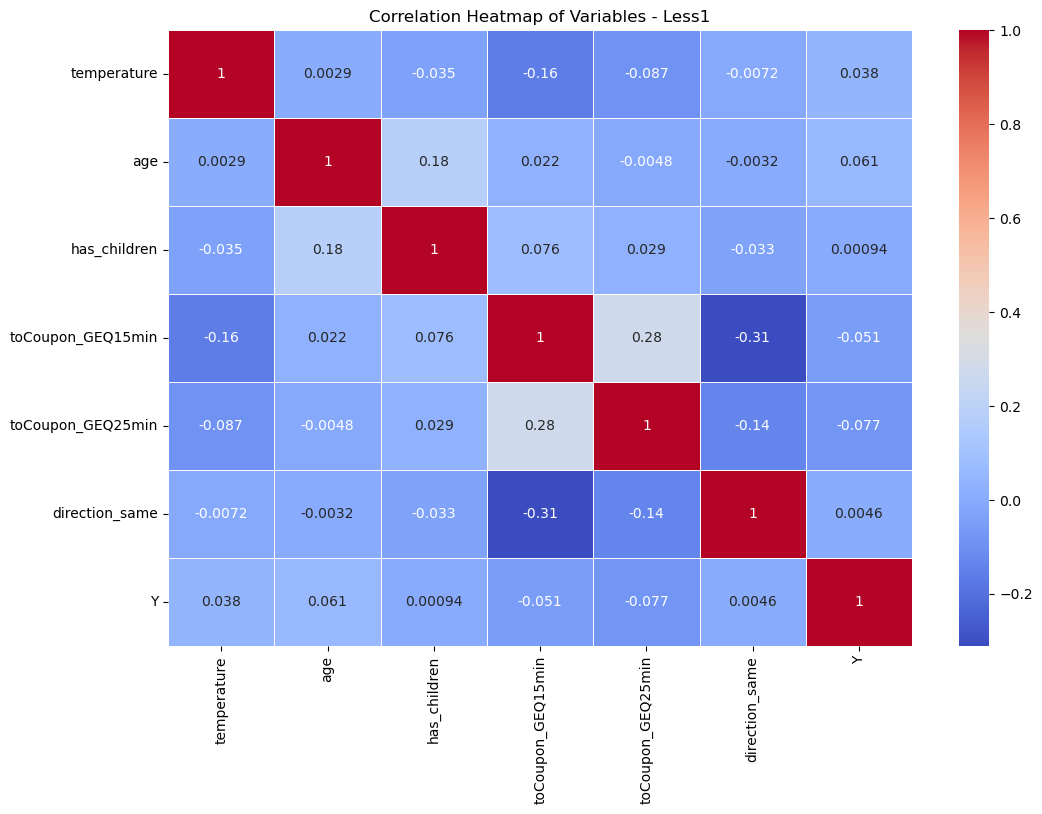

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_less1, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - Less1")
plt.show()
plt.savefig('images/HeatMap_less1.png')

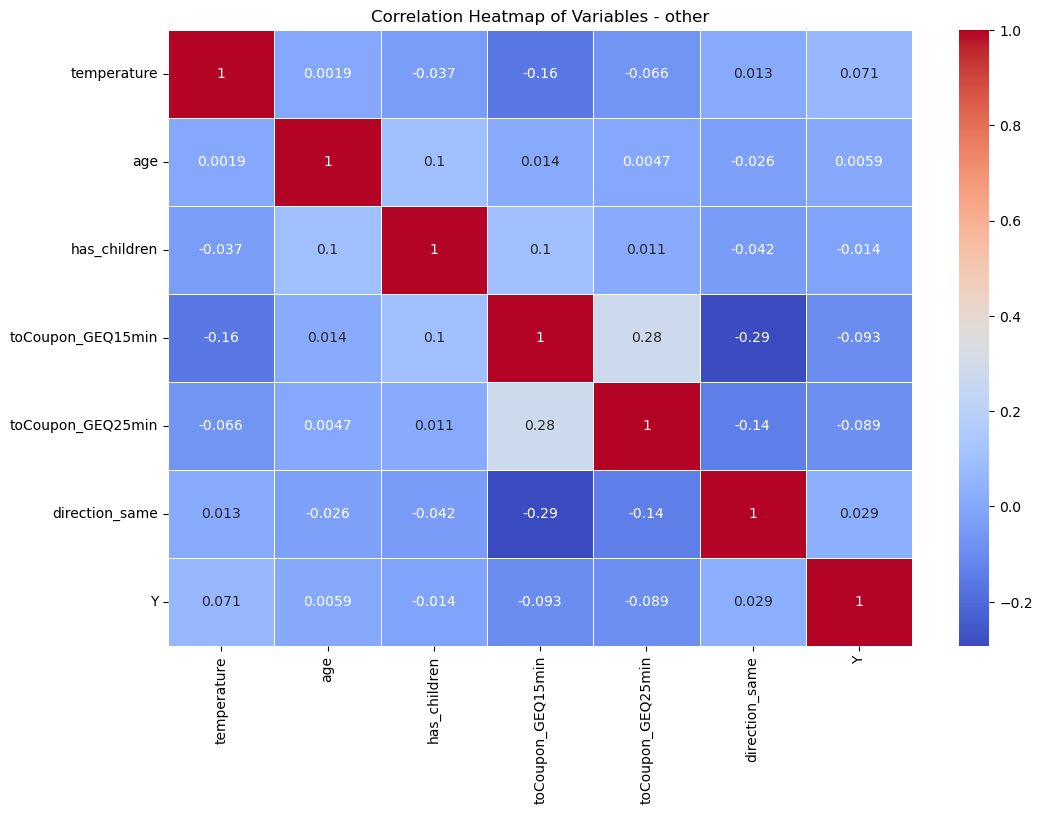

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_other, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - other")
plt.show()
plt.savefig('images/HeatMap_other.png')

In [28]:
# Group by the 'CoffeeHouse' column and calculate the mean for 'Y'
coffeehouse_mean = coffeehouse_group.groupby('CoffeeHouse')['Y'].mean().reset_index()
coffeehouse_mean.columns = ['CoffeeHouse', 'Mean Acceptance Rate']
print(coffeehouse_mean)
print('')

  CoffeeHouse  Mean Acceptance Rate
0         1~3              0.647291
1         4~8              0.682446
2         gt8              0.657895
3       less1              0.479504
4       never              0.175223



In [29]:
# List of columns to consider (excluding CoffeeHouse)
columns_to_analyze = ['gender', 'age', 'maritalStatus', 'education', 'income', 'occupation', 'passenger', 'weather', 'temperature', 'has_children', 'destination', 'expiration', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same']

# Create empty lists to store results
results_never = []
results_less1 = []
results_other = []

# Iterate through each column and calculate the mean acceptance rate for "Never"
for col in columns_to_analyze:
    unique_values_never = never[col].unique()
    for value in unique_values_never:
        subset = never[never[col] == value]
        acceptance_rate = subset['Y'].mean()
        results_never.append({'Column': col, 'Category': value, 'Acceptance Rate': acceptance_rate})
    unique_values_less1 = less1[col].unique()
    for value in unique_values_less1:
        subset = less1[less1[col] == value]
        acceptance_rate = subset['Y'].mean()
        results_less1.append({'Column': col, 'Category': value, 'Acceptance Rate': acceptance_rate})
    unique_values_other = other[col].unique()
    for value in unique_values_other:  # Changed from unique_values_everyone_else
        subset = other[other[col] == value]
        acceptance_rate = subset['Y'].mean()
        results_other.append({'Column': col, 'Category': value, 'Acceptance Rate': acceptance_rate})

# Create DataFrames from the results for each category
results_never_df = pd.DataFrame(results_never)
results_less1_df = pd.DataFrame(results_less1)
results_other_df = pd.DataFrame(results_other)

overall_mean_never = never['Y'].mean()
overall_mean_less1 = less1['Y'].mean()
overall_mean_other = other['Y'].mean()

# Sort the DataFrames by Acceptance Rate in descending order for each category
results_never_df = results_never_df.sort_values(by='Acceptance Rate', ascending=False)
results_less1_df = results_less1_df.sort_values(by='Acceptance Rate', ascending=False)
results_other_df = results_other_df.sort_values(by='Acceptance Rate', ascending=False)

# Results may show an acceptance rate of 1, which is not believable; you can exclude them from the results
results_never_df = results_never_df[results_never_df['Acceptance Rate'] < 1]
results_less1_df = results_less1_df[results_less1_df['Acceptance Rate'] < 1]
results_other_df = results_other_df[results_other_df['Acceptance Rate'] < 1]  # Added this line

# Pad the "Column" column to have 17 characters
results_never_df['Column'] = results_never_df['Column'].str.ljust(17)
results_less1_df['Column'] = results_less1_df['Column'].str.ljust(17)
results_other_df['Column'] = results_other_df['Column'].str.ljust(17)

# Ensure the 'Category' column is treated as strings
results_never_df['Category'] = results_never_df['Category'].astype(str)
results_less1_df['Category'] = results_less1_df['Category'].astype(str)
results_other_df['Category'] = results_other_df['Category'].astype(str)

# Ensure the 'Category' column is treated as strings
results_never_df['Category'] = results_never_df['Category'].apply(lambda x: x[:24] if len(x) > 24 else x)
results_less1_df['Category'] = results_less1_df['Category'].apply(lambda x: x[:24] if len(x) > 24 else x)
results_other_df['Category'] = results_other_df['Category'].apply(lambda x: x[:24] if len(x) > 24 else x)

In [30]:
# Print the sorted tables for each category
print("Overall Mean for 'Never' category:", overall_mean_never)
print("Results for 'Never' category:")
print(results_never_df.head(20))
print('')

Overall Mean for 'Never' category: 0.17522321428571427
Results for 'Never' category:
               Column                  Category  Acceptance Rate
39  occupation         Architecture & Engineeri         0.733333
19  education                  Some High School         0.500000
48  occupation         Installation Maintenance         0.428571
57  weather                               Rainy         0.314815
6   age                                      41         0.309524
31  occupation                          Student         0.305556
44  occupation         Life Physical Social Sci         0.300000
8   age                                      46         0.300000
22  income                      $50000 - $62499         0.294118
15  education              High School Graduate         0.293478
33  occupation         Construction & Extractio         0.266667
24  income                      $37500 - $49999         0.259615
2   age                                      21         0.257576
35  o

In [31]:
print("Overall Mean for 'Less than 1 time' category:", overall_mean_less1)
print("Results for 'Less than 1 time' category:")
print(results_less1_df.head(20))
print('')

Overall Mean for 'Less than 1 time' category: 0.47950428979980936
Results for 'Less than 1 time' category:
               Column                  Category  Acceptance Rate
48  occupation         Building & Grounds Clean         0.727273
7   age                                      36         0.666667
13  maritalStatus                      Divorced         0.666667
29  occupation                          Student         0.653846
49  occupation               Healthcare Support         0.619048
42  occupation         Transportation & Materia         0.619048
15  education                 Associates degree         0.604839
23  income                      $50000 - $62499         0.597701
63  destination                 No Urgent Place         0.580139
51  passenger                         Friend(s)         0.579937
57  weather                               Rainy         0.569231
27  income                     Less than $12500         0.563636
36  occupation         Healthcare Practitioners 

In [32]:
print("Overall Mean for 'Everyone Else' category:", overall_mean_other)
print("Results for 'Everyone Else' category:")
print(results_other_df.head(20))

Overall Mean for 'Everyone Else' category: 0.495668154371226
Results for 'Everyone Else' category:
               Column                  Category  Acceptance Rate
34  occupation         Healthcare Practitioners         0.760563
52  occupation         Building & Grounds Clean         0.727273
47  occupation         Transportation & Materia         0.618421
33  occupation               Healthcare Support         0.615385
30  occupation                          Student         0.614737
19  education                  Some High School         0.607143
54  passenger                         Friend(s)         0.596760
70  expiration                               1d         0.579727
66  destination                 No Urgent Place         0.577148
46  occupation         Installation Maintenance         0.568182
57  passenger                           Partner         0.565517
29  occupation         Architecture & Engineeri         0.555556
21  income                      $12500 - $24999         

In [33]:
# Define a function to create and show a bar plot for the top N categories
def create_top_n_bar_plot(df, category_name, category_column, acceptance_rate_column, n=10):
    # Sort the DataFrame by Acceptance Rate in descending order
    df = df.sort_values(by=acceptance_rate_column, ascending=False)

    # Convert category values to strings
    df[category_column] = df[category_column].astype(str)

    # Select the top N categories
    top_n_df = df.head(n)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(top_n_df[category_column], top_n_df[acceptance_rate_column])
    plt.xlabel(category_name)
    plt.ylabel('Acceptance Rate')
    plt.title(f'Top {n} {category_name} by Acceptance Rate')
    plt.xticks(rotation=90)
    plt.show()

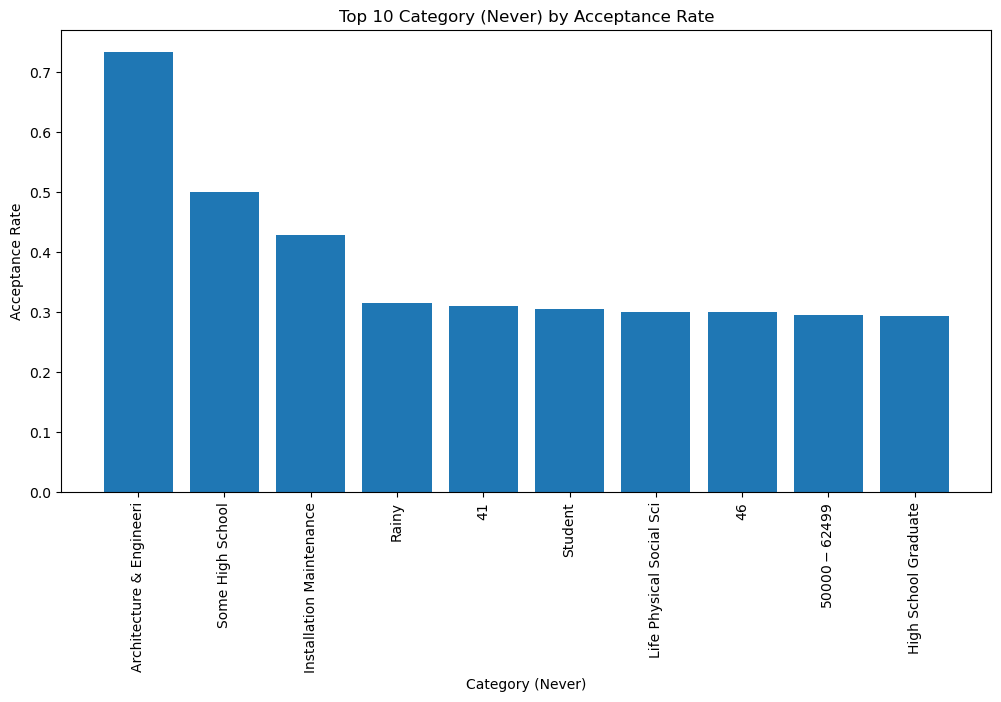

<Figure size 640x480 with 0 Axes>

In [34]:
# Create and show bar plots for the top 10 categories for each category
create_top_n_bar_plot(results_never_df, 'Category (Never)', 'Category', 'Acceptance Rate', n=10)
plt.savefig('images/Top10-Never.png')

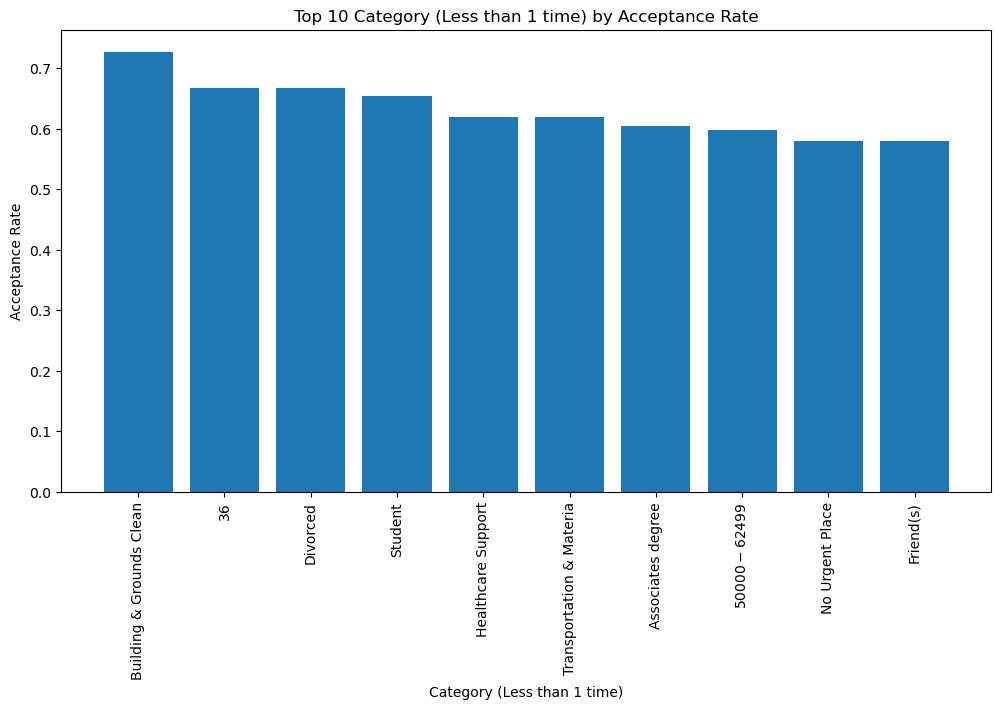

<Figure size 640x480 with 0 Axes>

In [35]:
create_top_n_bar_plot(results_less1_df, 'Category (Less than 1 time)', 'Category', 'Acceptance Rate', n=10)
plt.savefig('images/Top10-Less1.png')

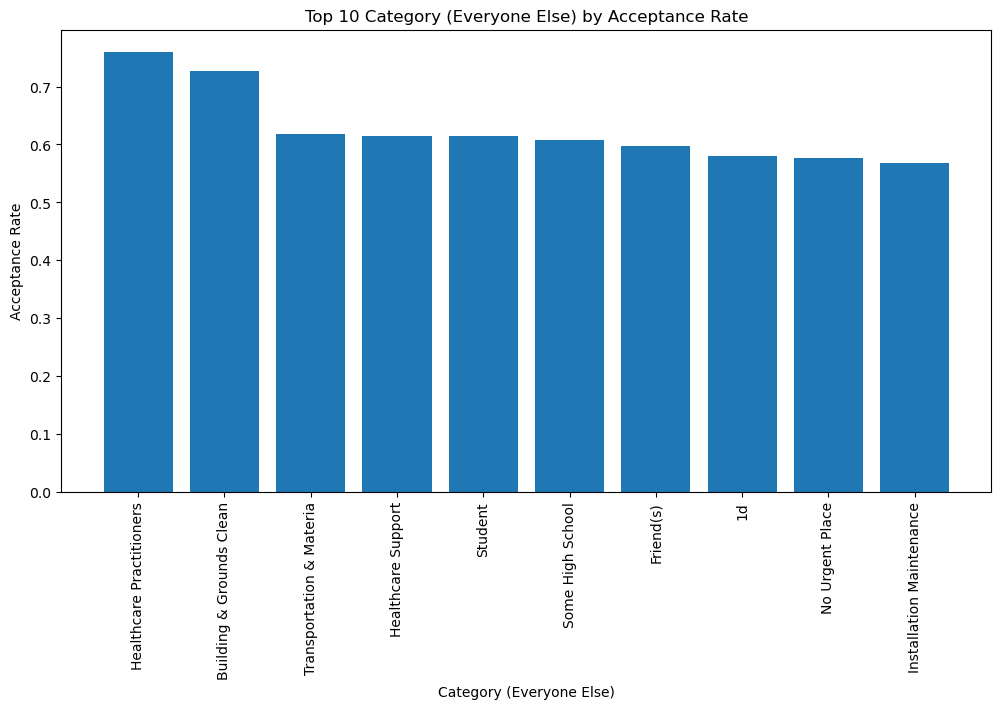

<Figure size 640x480 with 0 Axes>

In [36]:
create_top_n_bar_plot(results_other_df, 'Category (Everyone Else)', 'Category', 'Acceptance Rate', n=10)
plt.savefig('images/Top10-Other.png')

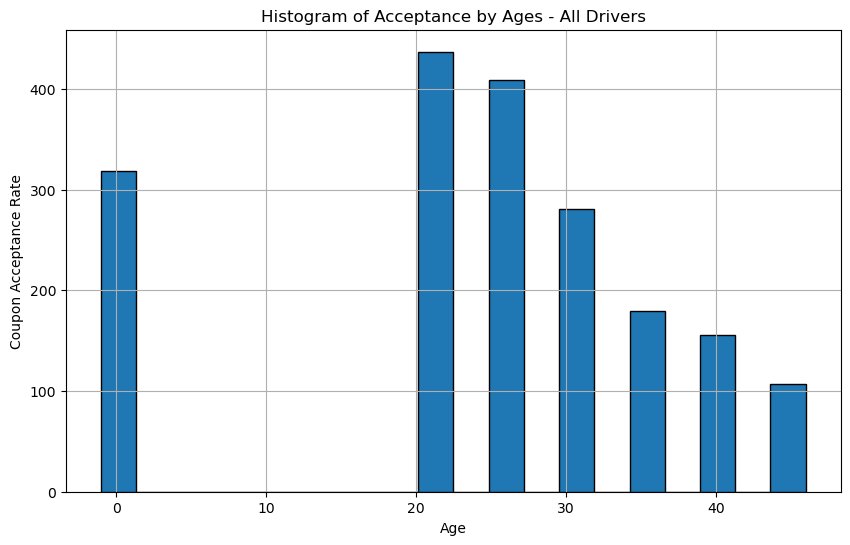

<Figure size 640x480 with 0 Axes>

In [61]:
# Filter the data to include only those who accepted the coupons
accepted_coupons_data = coffeehouse_group[coffeehouse_group['Y'] == 1]

# Create a histogram of the "age" column
plt.figure(figsize=(10, 6))
plt.hist(accepted_coupons_data['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Coupon Acceptance Rate')
plt.title('Histogram of Acceptance by Ages - All Drivers')
plt.grid(True)
plt.show()
plt.savefig('images/AgeHistogram-All.png')

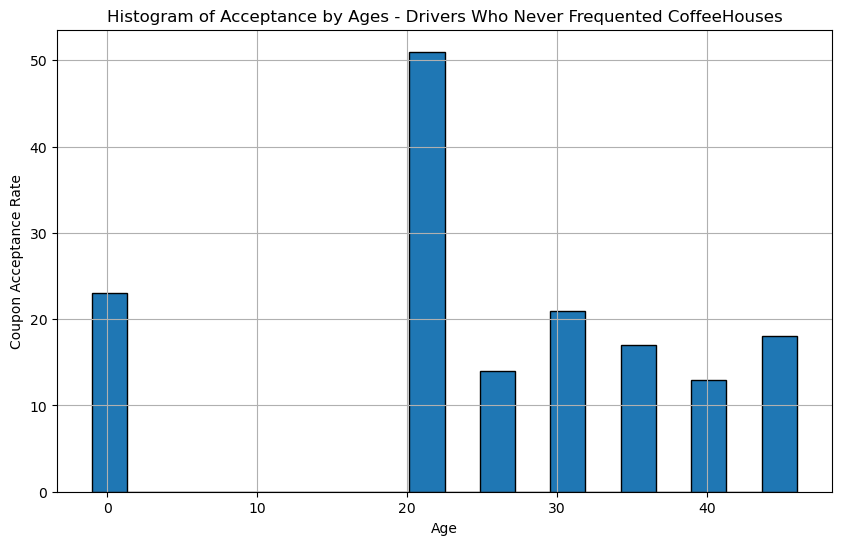

<Figure size 640x480 with 0 Axes>

In [63]:
# Filter the data to include only those who accepted the coupons
accepted_coupons_data = never[never['Y'] == 1]

# Create a histogram of the "age" column
plt.figure(figsize=(10, 6))
plt.hist(accepted_coupons_data['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Coupon Acceptance Rate')
plt.title('Histogram of Acceptance by Ages - Drivers Who Never Frequented CoffeeHouses')
plt.grid(True)
plt.show()
plt.savefig('images/AgeHistogram-Never.png')

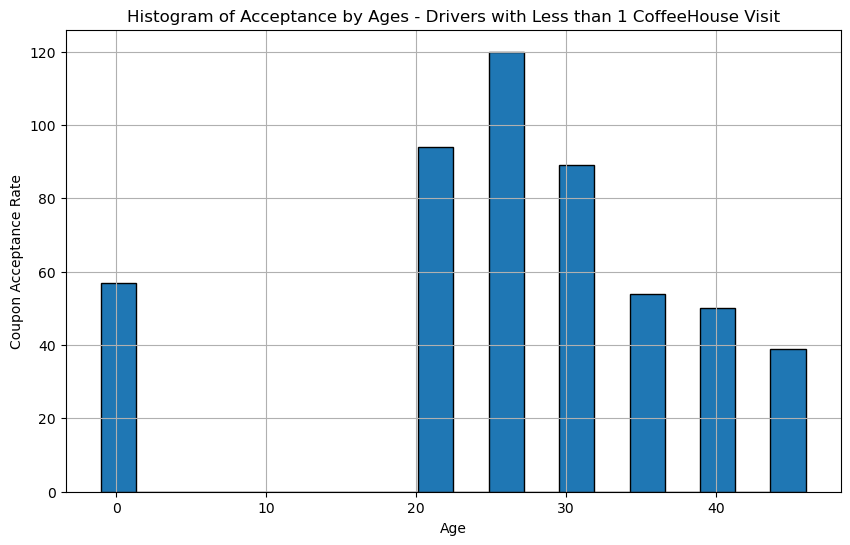

<Figure size 640x480 with 0 Axes>

In [64]:
# Filter the data to include only those who accepted the coupons
accepted_coupons_data = less1[less1['Y'] == 1]

# Create a histogram of the "age" column
plt.figure(figsize=(10, 6))
plt.hist(accepted_coupons_data['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Coupon Acceptance Rate')
plt.title('Histogram of Acceptance by Ages - Drivers with Less than 1 CoffeeHouse Visit')
plt.grid(True)
plt.show()
plt.savefig('images/AgeHistogram-Less1.png')

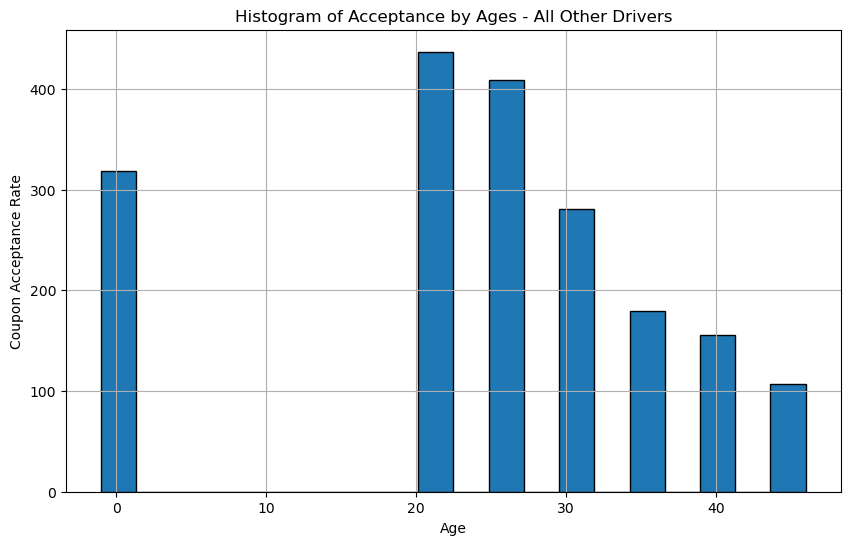

<Figure size 640x480 with 0 Axes>

In [65]:
# Filter the data to include only those who accepted the coupons
accepted_coupons_data = other[other['Y'] == 1]

# Create a histogram of the "age" column
plt.figure(figsize=(10, 6))
plt.hist(accepted_coupons_data['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Coupon Acceptance Rate')
plt.title('Histogram of Acceptance by Ages - All Other Drivers')
plt.grid(True)
plt.show()
plt.savefig('images/AgeHistogram-Other.png')

C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2951460670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_never = never.corr()
C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2951460670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_less1 = less1.corr()
C:\Users\Brendon Perkins\AppData\Local\Temp\ipykernel_12988\2951460670.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_other = other

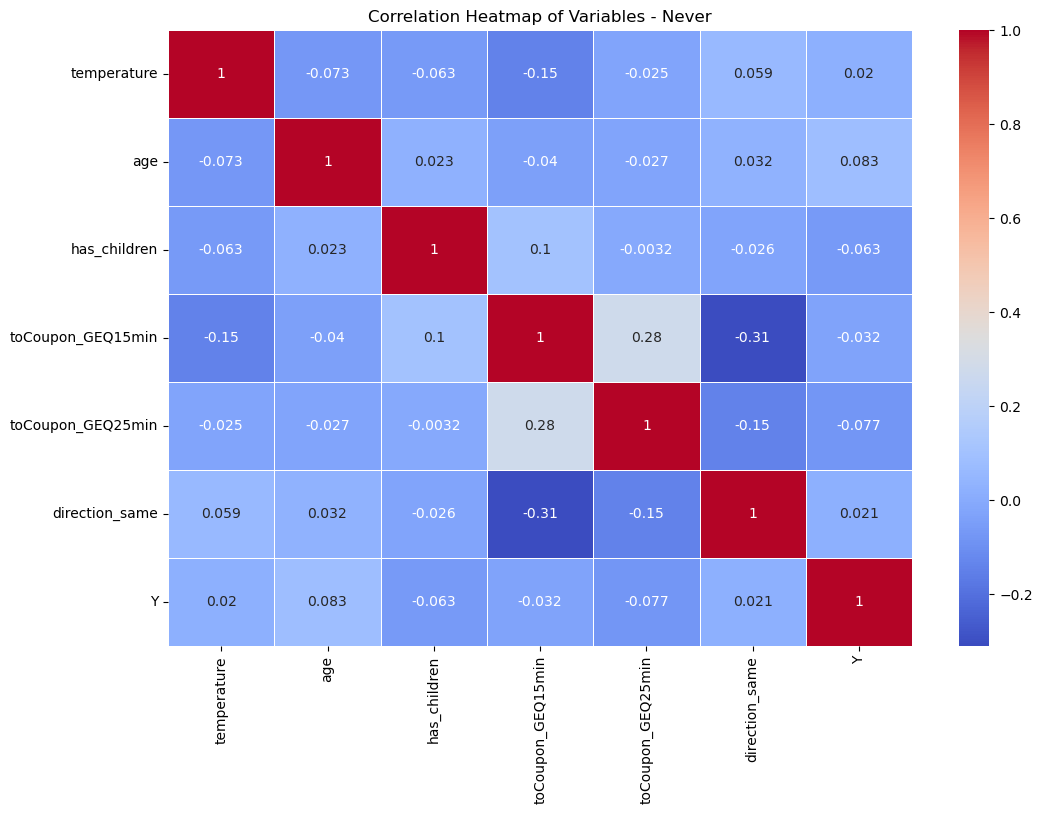

<Figure size 640x480 with 0 Axes>

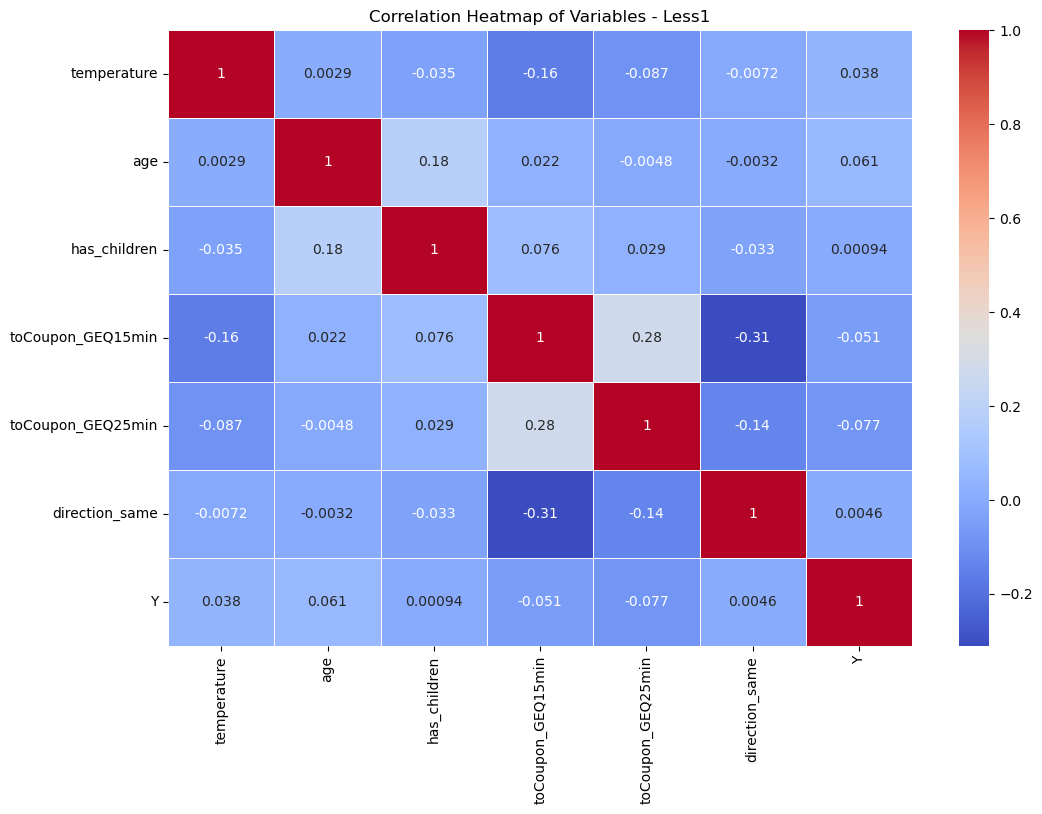

<Figure size 640x480 with 0 Axes>

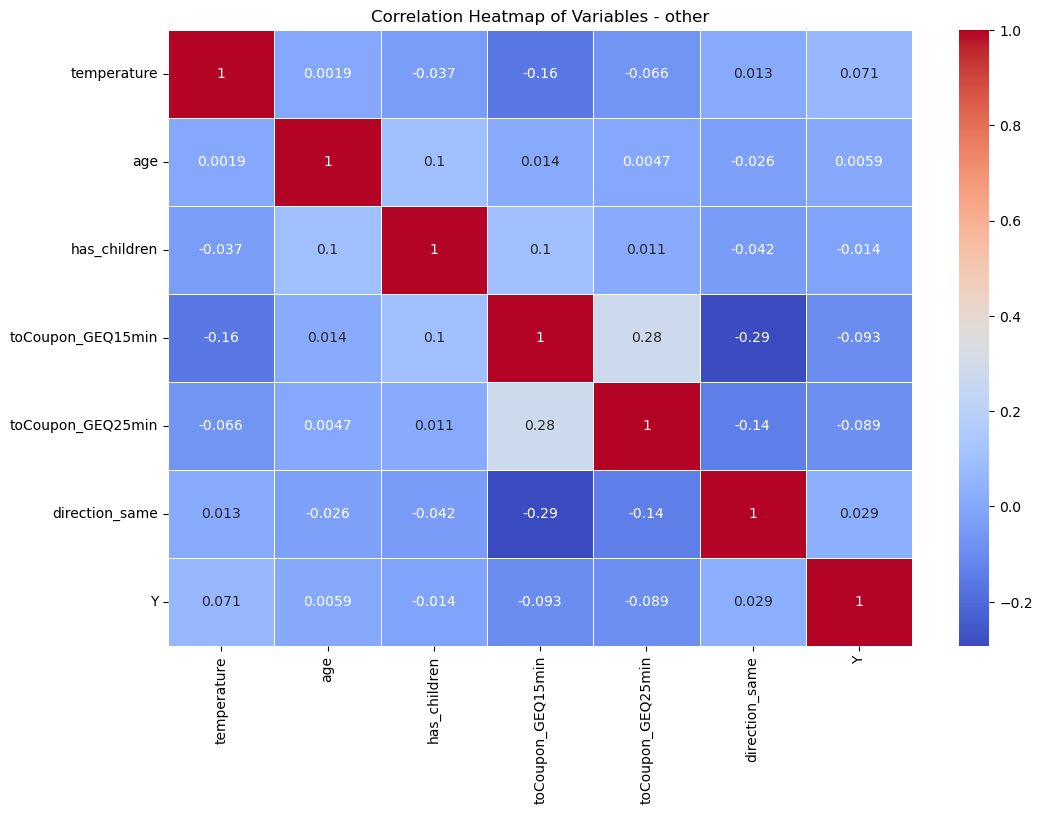

<Figure size 640x480 with 0 Axes>

In [60]:
correlation_matrix_never = never.corr()
correlation_matrix_less1 = less1.corr()
correlation_matrix_other = other.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_never, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - Never")
plt.show()
plt.savefig('images/HeatMap_never.png')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_less1, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - Less1")
plt.show()
plt.savefig('images/HeatMap_less1.png')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_other, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Variables - other")
plt.show()
plt.savefig('images/HeatMap_other.png')